# Portugese Bank campaign

## Data Importing/Data Exploration

In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
file = pd.read_csv(r'C:\Users\UBAID USMANI\Desktop\Projects\Internship work\bank-additional\bank-additional-full.csv',sep=';')

In [77]:
file.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [78]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [79]:
file.get_dtype_counts()

float64     5
int64       5
object     11
dtype: int64

### Numeric data analysis

In [80]:
file_numeric = file.select_dtypes(exclude=['object'])

In [81]:
file_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [82]:
file_numeric.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking for randomness in data

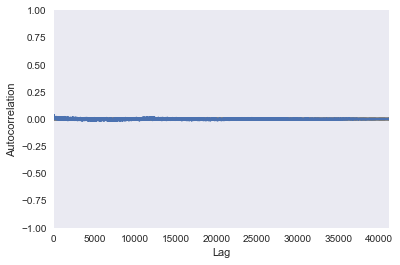

In [46]:
from pandas.plotting import scatter_matrix,parallel_coordinates,autocorrelation_plot,bootstrap_plot
autocorrelation_plot(file_numeric['duration'])

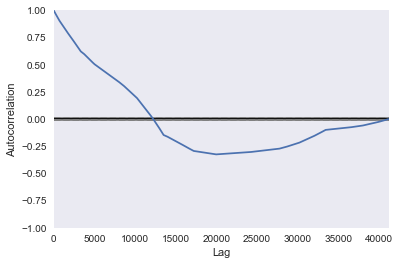

In [47]:
autocorrelation_plot(file_numeric['nr.employed'])

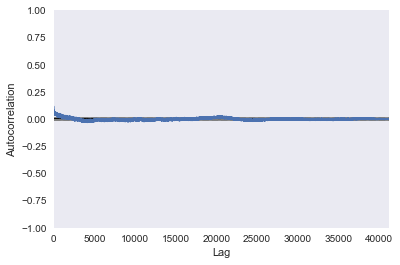

In [48]:
autocorrelation_plot(file_numeric['age'])

From the above autocorrelation plot we found that the age and duration is having max randomness and the nr.empoyed is having non random elements.

#### Relation between numeric data using correlation plot

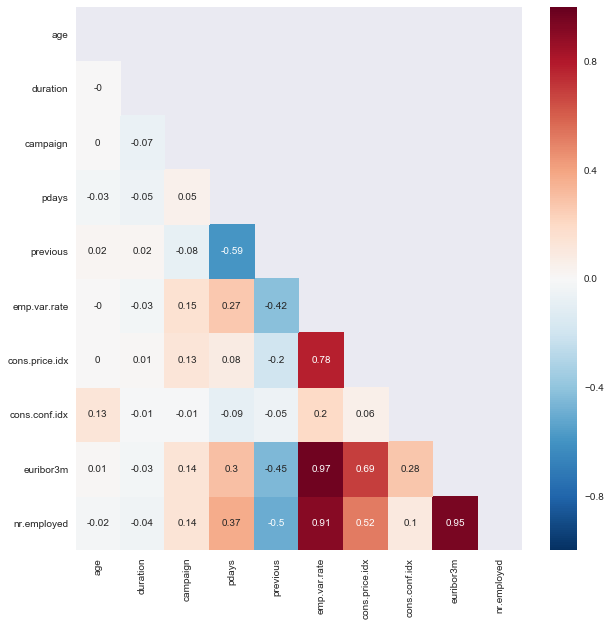

In [49]:
fig = plt.figure(figsize=(10,10))
corr_dataframe = file_numeric.corr()
mask = np.zeros_like(corr_dataframe)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(corr_dataframe,2),mask=mask,annot=True,cbar=True)

From the above correlation heatmap we found out that emp.var.rate is highly correlated with nr.employed,euribor3m and cons.price.idx. Also euribir3m is highly correlated to nr.employed. So removing all correlated data features will not affect the model much.

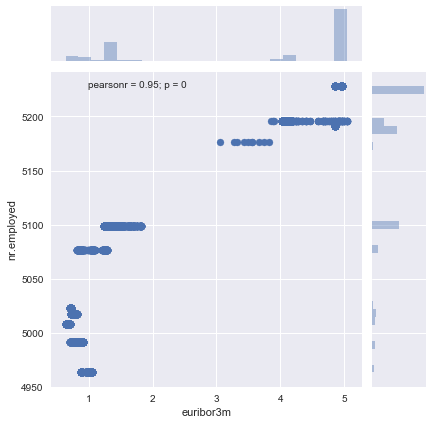

In [50]:
sns.jointplot(x='euribor3m', y='nr.employed', data=file_numeric)

The above sactter plot also prove that euribor3m and nr.employed are highly correlated

### Descriptive statistics analysis of data

We will check statistics of age duration and nr.empoyed because variation of distribution of these three feature are significant

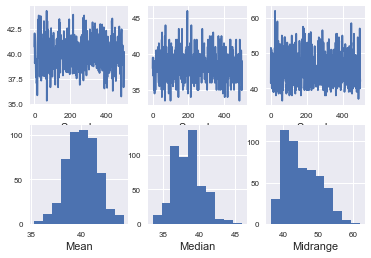

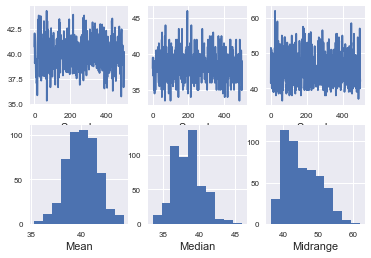

In [51]:
bootstrap_plot(file_numeric['age'])

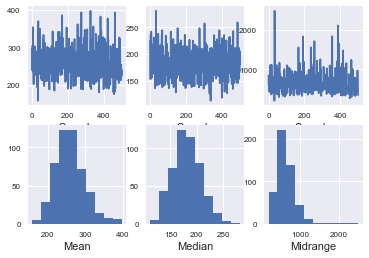

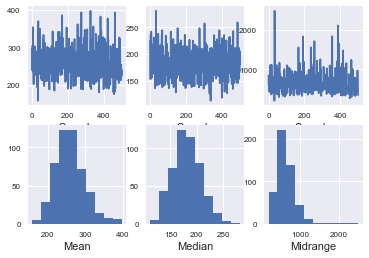

In [52]:
bootstrap_plot(file_numeric['duration'])

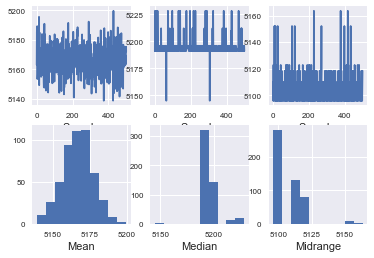

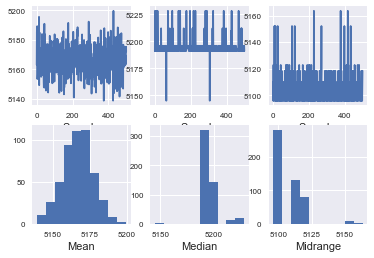

In [53]:
bootstrap_plot(file_numeric['nr.employed'])

### Distribution analysis of data

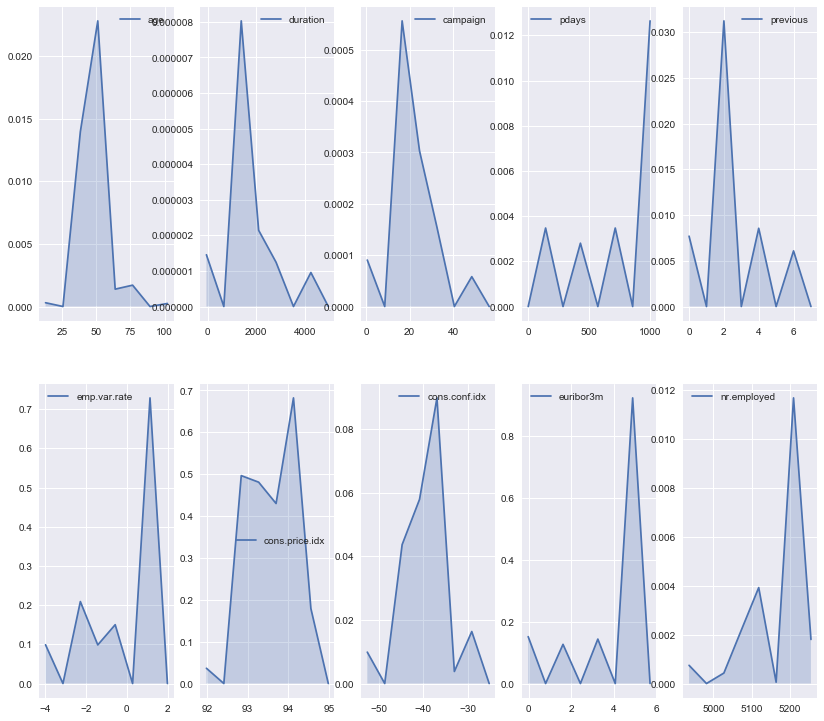

In [54]:
fig = plt.subplots(2,5,figsize=(18,12))
ax = plt.gca()
for i in range(1,11):
    plt.subplot(2,5,i)
    sns.kdeplot(file_numeric.iloc[:,i-1],shade=True,gridsize=6)
    plt.subplots_adjust(bottom=0.1,right=0.8,top=0.9,left=0.2)
plt.show()

### Outlier Detection

We will consider only those features whose distribution is not normal and represents multimodal data like pdays,euribor3m etc

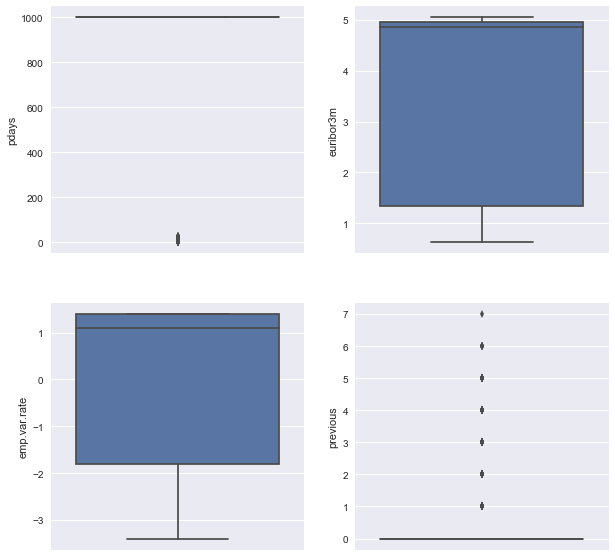

In [139]:
fig = plt.subplots(2,2,figsize=(10,10))
for i,j in zip(range(1,5),['pdays','euribor3m','emp.var.rate','previous']):
    plt.subplot(2,2,i)
    sns.boxplot(file_numeric[j],orient='vertical')
  

Thus the above boxplots shows us there is no significant outlier in these features however the value of pdays are more stagnant at one place close to 1000.

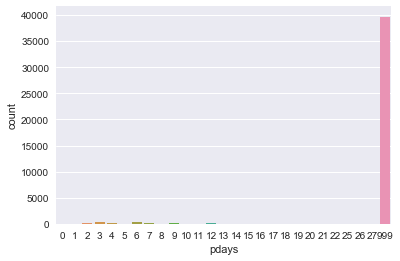

In [141]:
sns.countplot(file_numeric['pdays'])

Most of the values are equivalent to 999

(array([  1515.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  39673.]),
 array([   0. ,   99.9,  199.8,  299.7,  399.6,  499.5,  599.4,  699.3,
         799.2,  899.1,  999. ]),
 <a list of 10 Patch objects>)

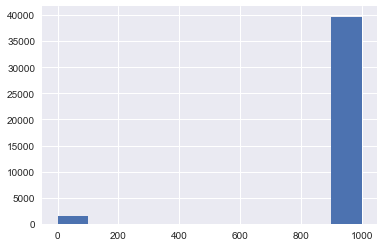

In [142]:
plt.hist(file_numeric['pdays'])

(array([ 102.,  603.,  490.,  116.,  122.,   55.,   15.,    6.,    3.,    3.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

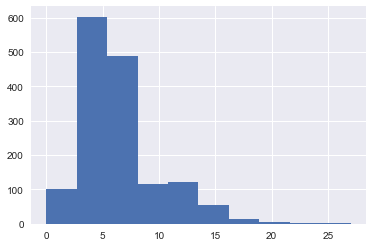

In [144]:
#eliminating all 999 values
plt.hist(file_numeric.loc[file_numeric['pdays']!=999]['pdays'])

Most of the pdays values are equal to 999 and make significant effect to other values. The pdays effect with such imbalanced data will surely affect the model.Thus we will try to manipulate this thing.

### Categorical data analysis 

In [55]:
file_categorical = file.select_dtypes(include=['object'])

In [56]:
file_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [57]:
file_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
y              41188 non-null object
dtypes: object(11)
memory usage: 3.5+ MB


### Categorical data analysis

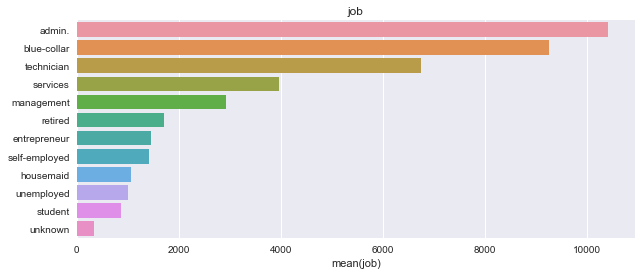

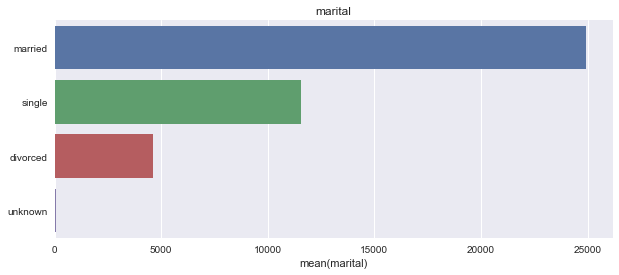

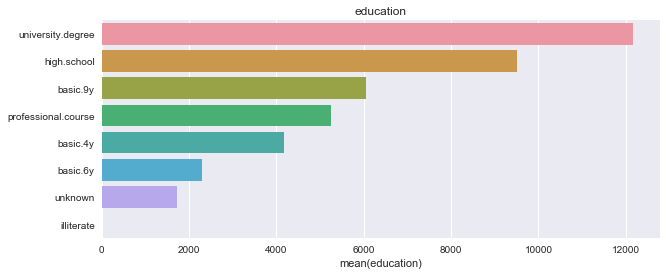

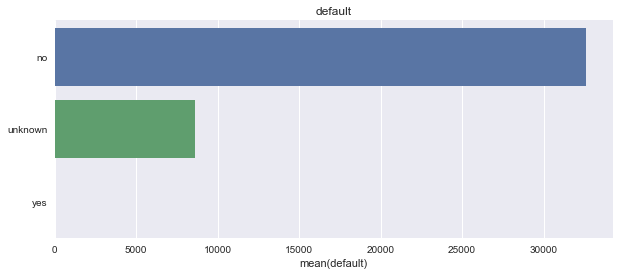

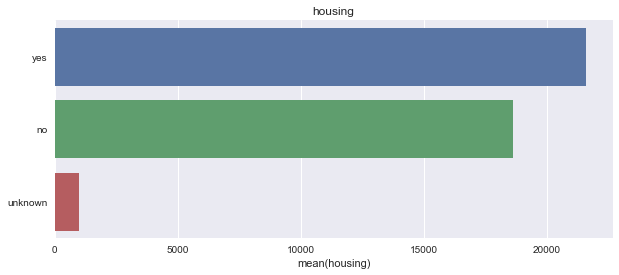

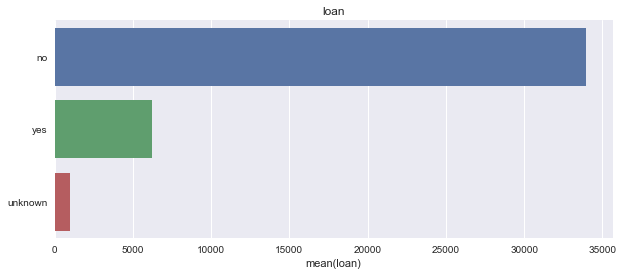

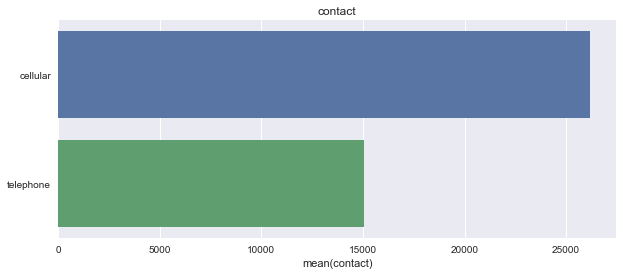

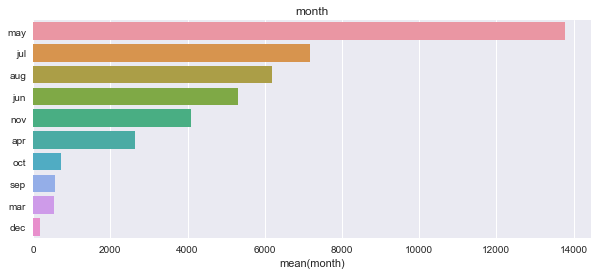

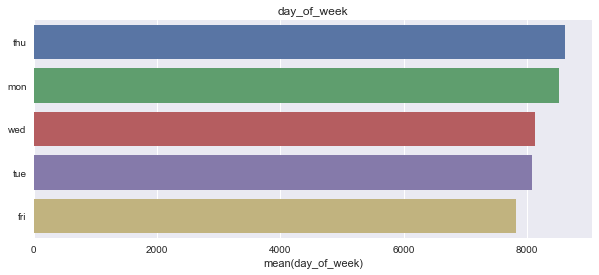

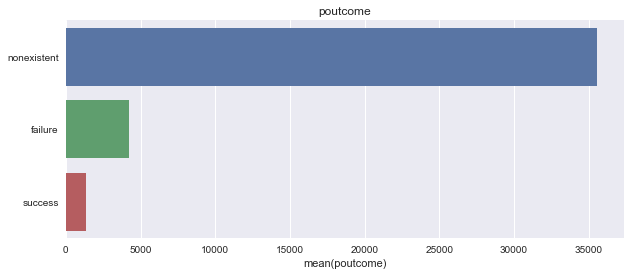

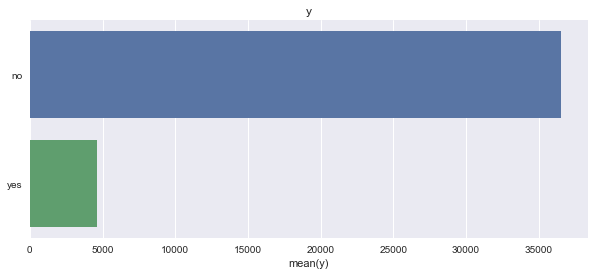

In [58]:
for i in file_categorical.columns:
    plt.figure(figsize=(10,4))
    sns.barplot(file_categorical[i].value_counts(),file_categorical[i].value_counts().index)
    plt.title(i)


### Normalized relative frquency plot
Plotting pos and neg frquency plot of each features categorically

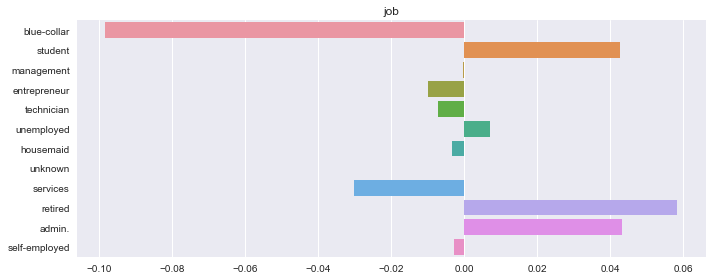

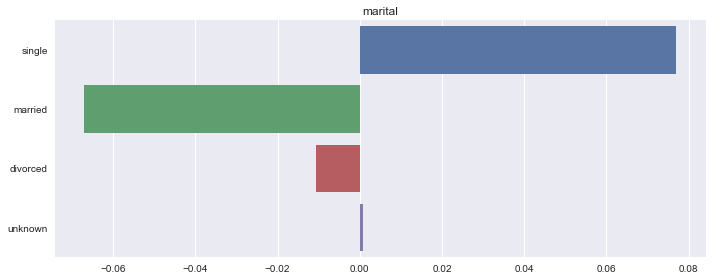

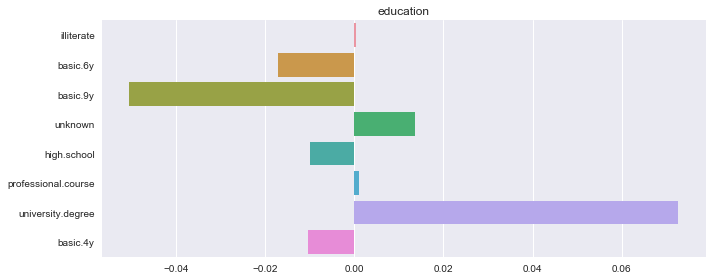

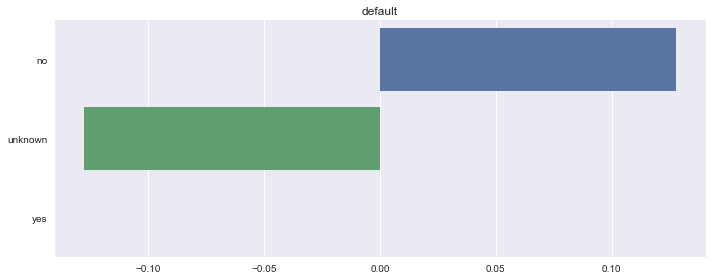

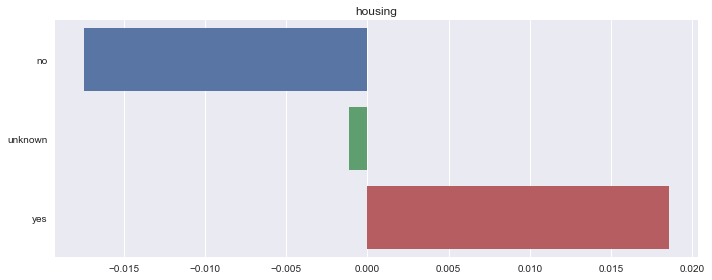

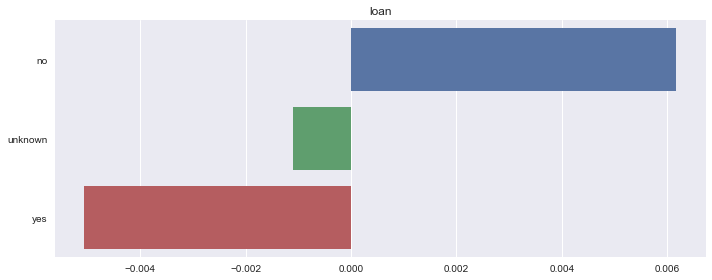

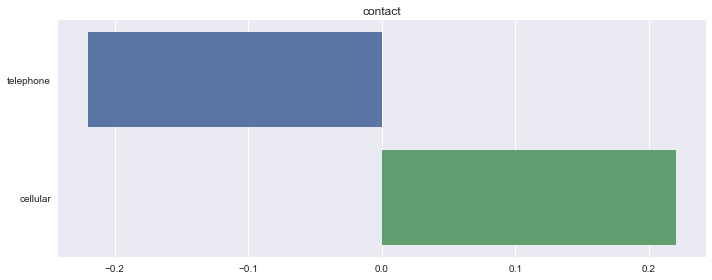

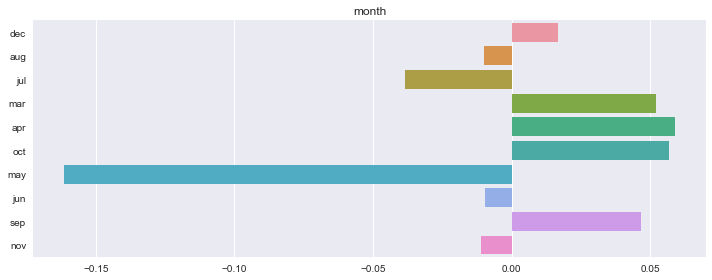

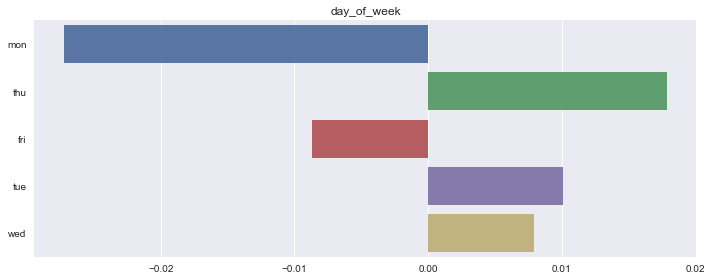

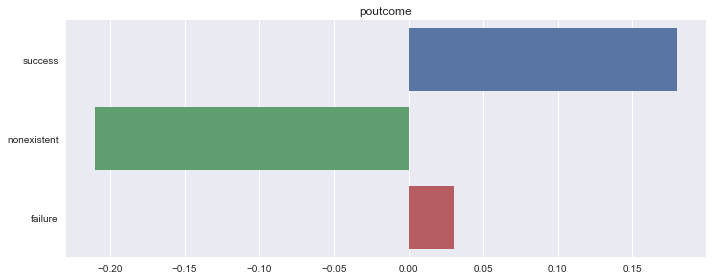

In [88]:
for col in file_categorical.columns[:-1]:
    plt.figure(figsize=(10,4))
    pos_counts = file_categorical.loc[file_categorical.y.values == 'yes', col].value_counts() 
    neg_counts = file_categorical.loc[file_categorical.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    freq_pos = (file_categorical.y.values == 'yes').sum()
    freq_neg = (file_categorical.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
    
    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()


### Inference/Result
- Found too many unknowns
- Significant unknown in job,default etc.
- Significant differnce between pos and neg frequencies in different classes can be seen in jobs,marital,education,weeks and months
- unknown value must beimputed inorder to cover up missing data

### Imputation
Now here we will impute the data based on the relationship between job and education


In [98]:
pd.crosstab(file_categorical.job,file_categorical.education,margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
job,,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249,10422
blue-collar,2318,1426,3623,878,8,453,94,454,9254
entrepreneur,137,71,210,234,2,135,610,57,1456
housemaid,474,77,94,174,1,59,139,42,1060
management,100,85,166,298,0,89,2063,123,2924
retired,597,75,145,276,3,241,285,98,1720
self-employed,93,25,220,118,3,168,765,29,1421
services,132,226,388,2682,0,218,173,150,3969
student,26,13,99,357,0,43,170,167,875


Thus we come to know the following details:
- all the unknown job people will be given the job related to the education required for a particular job
- all the unknown education people will be given the education required for a particular job

In [99]:
file_categorical.loc[(file_categorical['education']=='unknown') & (file_categorical['job']=='management'), 'education'] = 'university.degree'
file_categorical.loc[(file_categorical['education']=='unknown') & (file_categorical['job']=='services'), 'education'] = 'high.school'
file_categorical.loc[(file_categorical['education']=='unknown') & (file_categorical['job']=='housemaid'), 'education'] = 'basic.4y'
file_categorical.loc[(file_categorical['job'] == 'unknown') & (file_categorical['education']=='basic.4y'), 'job'] = 'blue-collar'
file_categorical.loc[(file_categorical['job'] == 'unknown') & (file_categorical['education']=='basic.6y'), 'job'] = 'blue-collar'
file_categorical.loc[(file_categorical['job'] == 'unknown') & (file_categorical['education']=='basic.9y'), 'job'] = 'blue-collar'
file_categorical.loc[(file_categorical['job']=='unknown') & (file_categorical['education']=='professional.course'), 'job'] = 'technician'


In [100]:
pd.crosstab(file_categorical.job,file_categorical.education,margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
job,,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249,10422
blue-collar,2370,1448,3654,878,8,453,94,454,9359
entrepreneur,137,71,210,234,2,135,610,57,1456
housemaid,516,77,94,174,1,59,139,0,1060
management,100,85,166,298,0,89,2186,0,2924
retired,597,75,145,276,3,241,285,98,1720
self-employed,93,25,220,118,3,168,765,29,1421
services,132,226,388,2832,0,218,173,0,3969
student,26,13,99,357,0,43,170,167,875


Similarly we can do for housing and loan as well . The dependency will be check on jobs

In [101]:
pd.crosstab(file_categorical.job,file_categorical.housing,margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4636,227,5559,10422
blue-collar,4362,241,4756,9359
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1363,71,1490,2924
retired,784,44,892,1720
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


The 'yes' and 'no' values should be proportional to the indiviual jobs. Suppose if admin job employee are selected then there must be proportionaly equal no of homed and homeless employees. 

In [102]:
pd.crosstab(file_categorical.job,file_categorical.loan,margins=True)

loan,no,unknown,yes,All
job,,,,
admin.,8485,227,1710,10422
blue-collar,7732,241,1386,9359
entrepreneur,1214,36,206,1456
housemaid,877,29,154,1060
management,2414,71,439,2924
retired,1436,44,240,1720
self-employed,1186,40,195,1421
services,3267,101,601,3969
student,710,23,142,875


The 'yes' and 'no' values should be proportional to the indiviual jobs. Suppose if admin job employee are selected then there must be proportionaly equal no of loan and non loaned employees. 

In [129]:
def impute_values(dataframe,feature):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed'\
          ,'entrepreneur','student']
    choice=["no","yes"]
    job_feature_crossstab = pd.crosstab(file_categorical.job,file_categorical[feature])
    for j in jobs:
        indices=dataframe.loc[(dataframe[feature] == 'unknown') & (dataframe['job'] == j)].index
        ''' checks for if the index is less than the no proportion in the total of values, thus trying to equate the proportion
        of no and yes values'''
        mask=np.random.rand(len(indices))<((job_feature_crossstab.loc[j]['no'])/(job_feature_crossstab.loc[j]['no']\
                                                                             +job_feature_crossstab.loc[j]['yes']))
        ind1=indices[mask]
        ind2=indices[~mask]
        dataframe.loc[ind1,feature]='no'
        dataframe.loc[ind2,feature]='yes'
    return dataframe

In [130]:
for i in ['loan','housing']:
    file_categorical_imputed = impute_values(file_categorical,i)

In [131]:
pd.crosstab(file_categorical_imputed.job,file_categorical_imputed.housing,margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4736,0,5686,10422
blue-collar,4472,0,4887,9359
entrepreneur,654,0,802,1456
housemaid,502,0,558,1060
management,1405,0,1519,2924
retired,804,0,916,1720
self-employed,657,0,764,1421
services,1863,0,2106,3969
student,397,0,478,875


In [132]:
pd.crosstab(file_categorical_imputed.job,file_categorical_imputed.loan,margins=True)

loan,no,unknown,yes,All
job,,,,
admin.,8671,0,1751,10422
blue-collar,7931,0,1428,9359
entrepreneur,1242,0,214,1456
housemaid,897,0,163,1060
management,2475,0,449,2924
retired,1475,0,245,1720
self-employed,1219,0,202,1421
services,3352,0,617,3969
student,732,0,143,875


Thus we can see the unknown values from housing and loans have been reduced and removed from the dataset. 

## Data preprocessing

In [145]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
label_encode_transform = LabelEncoder()

file_categorical1 = file_categorical_imputed.apply(lambda col:label_encode_transform.fit_transform(col))

file_categorical1.head(7)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0
5,7,1,2,1,0,0,1,6,1,1,0
6,0,1,5,0,0,0,1,6,1,1,0


In [146]:
print(type(file_categorical1))

file_categorical1.max(axis=0)

<class 'pandas.core.frame.DataFrame'>


job            11
marital         3
education       7
default         2
housing         2
loan            2
contact         1
month           9
day_of_week     4
poutcome        2
y               1
dtype: int64

### Since the categorical values are quite variable and the label encoders are varying like job has label encoded till 11 and contact label is 1. Thus the label encoded values need to be converted to One-hot coded values.

### DictVectorizer combine both the label encoding and one hot vector formation together.

In [147]:
file_categorical.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
y              object
dtype: object

In [148]:
from sklearn.feature_extraction import DictVectorizer
file_sklearnfile_categorical = file_categorical.T.to_dict().values()


In [149]:
didct_vector = DictVectorizer()
encoded_dataframe = didct_vector.fit_transform(file_sklearnfile_categorical).toarray()

In [150]:
encoded_dataframe

array([[ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1.,  0.]])

In [151]:
didct_vector.get_feature_names()

['contact=cellular',
 'contact=telephone',
 'day_of_week=fri',
 'day_of_week=mon',
 'day_of_week=thu',
 'day_of_week=tue',
 'day_of_week=wed',
 'default=no',
 'default=unknown',
 'default=yes',
 'education=basic.4y',
 'education=basic.6y',
 'education=basic.9y',
 'education=high.school',
 'education=illiterate',
 'education=professional.course',
 'education=university.degree',
 'education=unknown',
 'housing=no',
 'housing=unknown',
 'housing=yes',
 'job=admin.',
 'job=blue-collar',
 'job=entrepreneur',
 'job=housemaid',
 'job=management',
 'job=retired',
 'job=self-employed',
 'job=services',
 'job=student',
 'job=technician',
 'job=unemployed',
 'job=unknown',
 'loan=no',
 'loan=unknown',
 'loan=yes',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'marital=unknown',
 'month=apr',
 'month=aug',
 'month=dec',
 'month=jul',
 'month=jun',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'poutcome=failure',
 'poutcome=nonexistent',
 'poutcome=success',


In [152]:
categorical_dataframe = pd.DataFrame(encoded_dataframe,columns = didct_vector.get_feature_names())

In [153]:
categorical_dataframe.head()

,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,default=no,default=unknown,default=yes,...,month=mar,month=may,month=nov,month=oct,month=sep,poutcome=failure,poutcome=nonexistent,poutcome=success,y=no,y=yes
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Model Pipelining

In [154]:
main_table = file_numeric.join(categorical_dataframe)

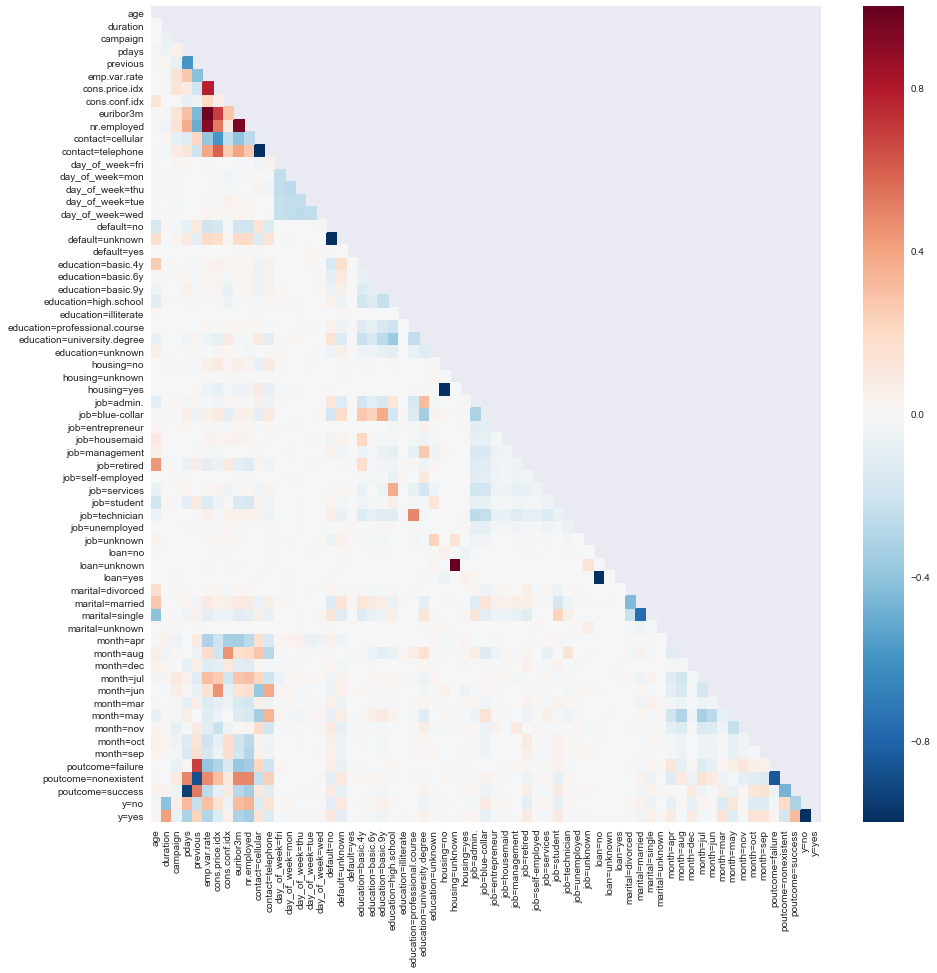

In [160]:
fig = plt.subplots(figsize=(15,15))
mask = np.zeros_like(main_table.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(main_table.corr(),2),cbar=True,mask=mask)

From the above heat map we can see that 'y_yes' (our target variable) has good correlation with 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays_missing', 'poutcome_success' , 'poutcome_nonexistent'.

### Train/test Distribution

In [170]:
print(main_table.columns)


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'contact=cellular', 'contact=telephone', 'day_of_week=fri',
       'day_of_week=mon', 'day_of_week=thu', 'day_of_week=tue',
       'day_of_week=wed', 'default=no', 'default=unknown', 'default=yes',
       'education=basic.4y', 'education=basic.6y', 'education=basic.9y',
       'education=high.school', 'education=illiterate',
       'education=professional.course', 'education=university.degree',
       'education=unknown', 'housing=no', 'housing=unknown', 'housing=yes',
       'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed', 'job=services',
       'job=student', 'job=technician', 'job=unemployed', 'job=unknown',
       'loan=no', 'loan=unknown', 'loan=yes', 'marital=divorced',
       'marital=married', 'marital=single', 'marital=unknown', 'month=apr',
     

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train,test = train_test_split(main_table,train_size=0.8,random_state=32)
X=list(train.columns) 
Y='y=yes'
X.remove('y=yes')
scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
validate_std = scaler.transform(test[X])
x_train = train_std
y_train = train[Y]
x_test = validate_std
y_test = test[Y]

### Trying modelling

In [183]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,RFECV,SelectFromModel
from sklearn.pipeline import make_union
from sklearn.metrics import accuracy_score,classification_report


classifiers= {'ada_clf': AdaBoostClassifier(),\
              'rfc_clf': RandomForestClassifier(),\
              'gbc_clf': GradientBoostingClassifier()}

for i in classifiers.keys():
    clf = classifiers[i]
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(y_pred.shape,y_test.shape)
    print("{} accuracy: {}".format(classifiers[i],accuracy_score(y_test,y_pred)))
    print(classifica)

(8238,) (8238,)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) accuracy: 1.0
(8238,) (8238,)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) accuracy: 1.0
(8238,) (8238,)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, wa

In [68]:
from sklearn.ensemble import RandomForestClassifier
main_table = file_numeric.join(categorical_dataframe)

In [72]:
x_train = main_table.iloc[:,:-2]
y_train = main_table.iloc[:,-1]
feature_selector = RandomForestClassifier(n_estimators=250,
                              random_state=0)
columns = main_table.columns[:-2]
feature_selector.fit(x_train,y_train)
important_features = feature_selector.feature_importances_
indices = np.argsort(important_features)

feature_important_dataframe = pd.DataFrame(columns=['feature_name','importance'])
feature_important_dataframe['feature_name'] = [columns[indices[i]] for i in range(x_train.shape[1]) ]
feature_important_dataframe['importance'] = [important_features[indices[i]] for i in range(x_train.shape[1])]

In [73]:
feature_important_dataframe

,feature_name,importance
0,default=yes,4.714297e-08
1,education=illiterate,2.179177e-04
2,marital=unknown,4.948644e-04
3,month=dec,8.796918e-04
4,job=unknown,1.594538e-03
5,loan=unknown,1.865961e-03
6,housing=unknown,1.867738e-03
7,month=sep,2.133652e-03
8,month=nov,2.160203e-03
9,month=jul,2.488871e-03


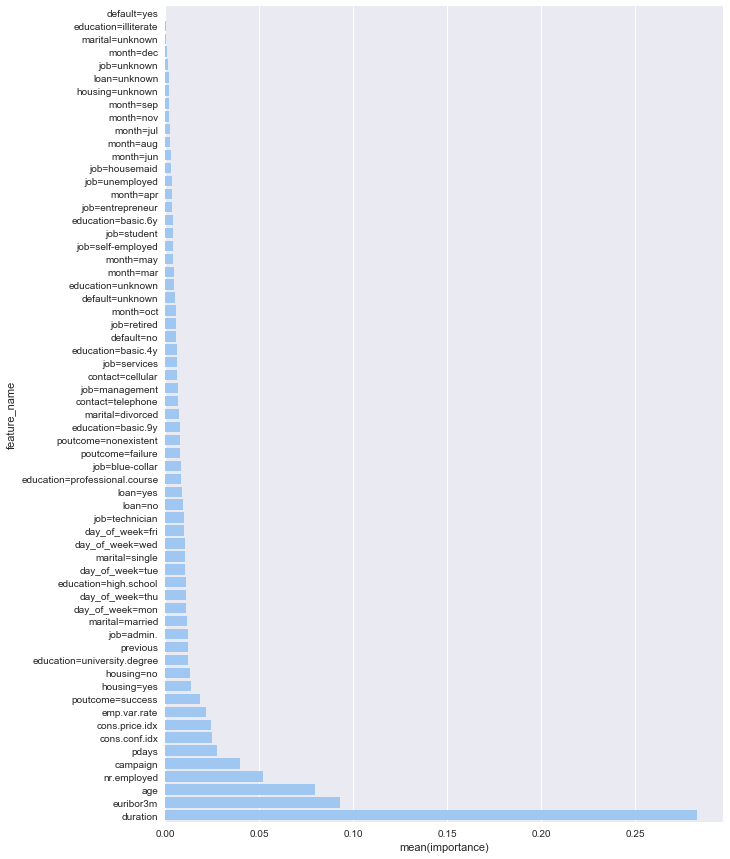

In [74]:
ax,fig = plt.subplots(figsize=(10,15))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y="feature_name", data=feature_important_dataframe,
            label="Importance", color="b")
plt.show()